### 히스토그램 그리기

In [1]:
'''
hist() 함수 사용
히스토그램은 자료의 도수분포상태를 직사각형 막대그래프로 나타낸것
데이타의 빈도(도수)에 따라서 높이가 결정된다.
plot() 함수를 이용해서 직선 혹은 꺽은선을
scatter() 함수를 이용해서 산포도(산점도)를 그렸듯이
hist() 함수를 이용해서 막대그래프를 그려보자.
'''

'\nhist() 함수 사용\n히스토그램은 자료의 도수분포상태를 직사각형 막대그래프로 나타낸것\n데이타의 빈도(도수)에 따라서 높이가 결정된다.\nplot() 함수를 이용해서 직선 혹은 꺽은선을\nscatter() 함수를 이용해서 산포도(산점도)를 그렸듯이\nhist() 함수를 이용해서 막대그래프를 그려보자.\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

In [3]:
# plot 시 한글이 깨지는 현상 방지!
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')

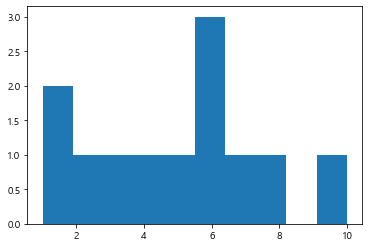

In [4]:
plt.hist([1, 1, 2, 3, 4, 5, 6, 6, 6, 7, 8, 10])
plt.show()

In [5]:
dice = []
for i in range(5):
    dice.append(np.random.randint(1, 7))
print(dice)

[5, 3, 5, 2, 1]


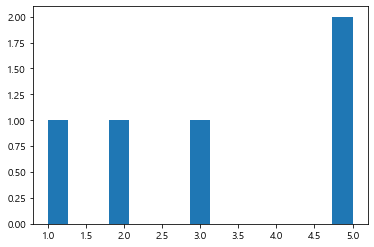

In [6]:
'''
bins 가 작으면 막대그래프가 뭉뚱그려진다.
bins 가 너무 큰값이면 이빨처럼 촘촘해진다.
히스토그램을 그릴때는 bins값을 잘 지정하는 것이 중요
기본값도 적당하다.

bins
해당 막대의 영역을 얼마나 채울건지를 결정하는 값
'''
plt.hist(dice, bins=15)
plt.show()

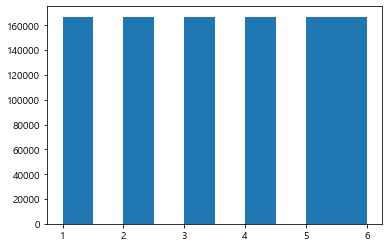

In [7]:
'''
주사위를 던지는 횟수를 늘릴수록 특정한 숫자가 나오는 횟수가 전체의 1/6에
가까워진다.. '큰수의 법칙'을 히스토그램으로 확인
'''
for i in range(1000000):
    dice.append(np.random.randint(1, 7))
plt.hist(dice)
plt.show()

In [8]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
x #일만개의 값이 들어있다.
len(x)
x.shape #튜플로 나오는 의미 - 차원 때문.. , 뒤에 값이 없다는 건.. 1차원이라는 의미

(10000,)

<a list of 10 Patch objects>


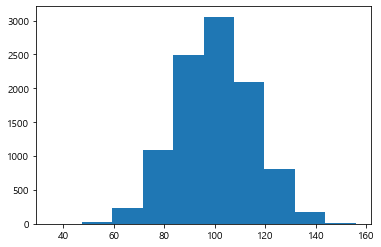

In [9]:
# plt.hist?
# n 값의 정보들
# bins 구간 정보들
# patches 그래프 정보가 넘어온다

n, bins, patches = plt.hist(x)
# plt.show()
print(patches)

<a list of 50 Patch objects>
[ 35.28539584  37.69538554  40.10537524  42.51536493  44.92535463
  47.33534432  49.74533402  52.15532372  54.56531341  56.97530311
  59.38529281  61.7952825   64.2052722   66.61526189  69.02525159
  71.43524129  73.84523098  76.25522068  78.66521038  81.07520007
  83.48518977  85.89517946  88.30516916  90.71515886  93.12514855
  95.53513825  97.94512795 100.35511764 102.76510734 105.17509704
 107.58508673 109.99507643 112.40506612 114.81505582 117.22504552
 119.63503521 122.04502491 124.45501461 126.8650043  129.274994
 131.68498369 134.09497339 136.50496309 138.91495278 141.32494248
 143.73493218 146.14492187 148.55491157 150.96490126 153.37489096
 155.78488066]
[  1.   0.   1.   0.   2.   2.   5.   5.   9.   8.  20.  38.  35.  57.
  88. 127. 155. 228. 260. 321. 372. 474. 529. 523. 591. 633. 584. 642.
 611. 587. 543. 482. 400. 363. 311. 266. 207. 159. 105.  67.  60.  42.
  43.  21.  10.   3.   5.   3.   1.   1.]


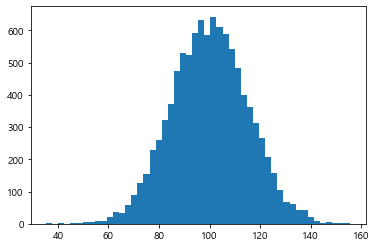

In [10]:
# 값의 정보들을 좀더 세밀하게 보고 싶다면?
n, bins, patches = plt.hist(x, bins=50)
print(patches)
print(bins) # 계급의 구간.. 계급의 수를 늘리고 줄이고의 차이?
print(n)

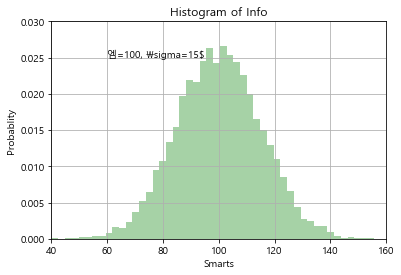

In [11]:
n, bins, patches = plt.hist(x, bins=50, density=1, facecolor='g', alpha=0.35) # 투명도 0~1
plt.xlabel('Smarts')
plt.ylabel('Probablity')
plt.title('Histogram of Info')
plt.grid()
plt.text(60, 0.025, r'엠=100, \sigma=15$')
plt.axis([40, 160, 0,  0.03])
plt.show()

### Pandas를 이용한 Plot 시각화

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) # 기본값이 day 
ts

2000-01-01   -1.080955
2000-01-02   -0.824454
2000-01-03   -0.222314
2000-01-04    0.430615
2000-01-05   -0.288343
                ...   
2002-09-22    0.285426
2002-09-23    0.812922
2002-09-24   -1.853499
2002-09-25    1.519823
2002-09-26   -0.089851
Freq: D, Length: 1000, dtype: float64

In [13]:
ts = ts.cumsum() # 누적된 값으로 표현

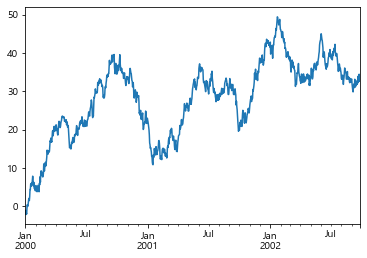

In [14]:
ts.plot()

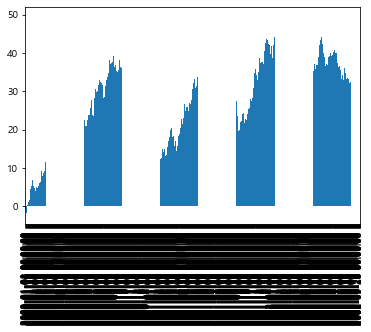

In [15]:
ts.plot(kind='bar') #맞지 않는 그래프를 사용했을시 시간만 오래걸림

In [16]:
x = np.linspace(0, 14, 100) # 0부터 14까지의 값을 100간격으로 쪼갤때 사용
x
y = np.sin(x)
y

array([ 0.        ,  0.14094328,  0.27907268,  0.41163048,  0.53597023,
        0.64960951,  0.75027957,  0.83597055,  0.90497167,  0.95590534,
        0.98775469,  0.99988386,  0.99205069,  0.96441158,  0.91751832,
        0.85230712,  0.7700799 ,  0.67247831,  0.56145091,  0.43921435,
        0.30820902,  0.1710504 ,  0.03047682, -0.11070522, -0.24967706,
       -0.38366419, -0.5099916 , -0.6261372 , -0.72978219, -0.81885732,
       -0.89158426, -0.94651102, -0.98254101, -0.99895492, -0.99542503,
       -0.97202182, -0.92921254, -0.86785185, -0.78916479, -0.69472233,
       -0.58640998, -0.46639016, -0.33705902, -0.20099861, -0.06092533,
        0.0803643 ,  0.22004948,  0.35534146,  0.48353916,  0.60208317,
        0.7086068 ,  0.80098333,  0.87736852,  0.93623734,  0.9764145 ,
        0.99709789,  0.99787456,  0.97872901,  0.94004348,  0.8825903 ,
        0.8075165 ,  0.71632092,  0.61082424,  0.49313267,  0.36559587,
        0.23076008,  0.09131724, -0.04994872, -0.19021747, -0.32

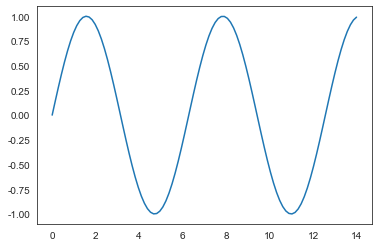

In [17]:
sns.set_style('white') # 배경색 기본값
plt.plot(x, y)
plt.show()

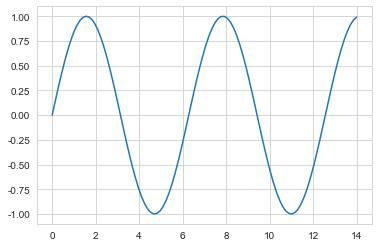

In [18]:
# sns.set_style('dark')
# sns.set_style('darkgrid')
sns.set_style('whitegrid')
plt.plot(x, y)
plt.show()

### Seborn - Boxplot

In [19]:
# 0부터 100까지의 총 101개의 숫자를 만든다...
xs = np.array(np.linspace(start=0, stop=100, num=101))
xs

df = DataFrame(xs, columns=['feature'])
df

,feature
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


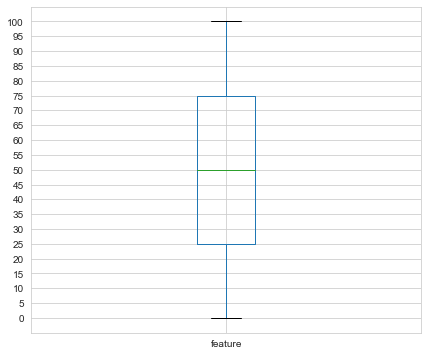

In [20]:
'''
출력결과를 보면,
25, 75 사이에 박스가 그려지고 중앙값인 50에 녹색선이 그려진다.
최소값 0과 최대값 100에 검은색 가로선이 그려진다
전체 데이타를 4등분
4분위
'''
plt.figure(figsize=(7,6)) #크기 지정
df.boxplot(column=['feature'])
plt.yticks(np.arange(0, 101, step=5))
plt.show()

In [21]:
tips = sns.load_dataset('tips') # seaborn 라이브러리에 이미 존재함
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


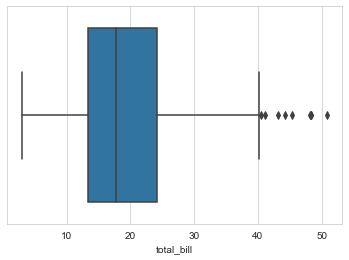

In [22]:
# plt.figure(figsize=(4,2))
sns.boxplot(tips['total_bill'])
plt.show()

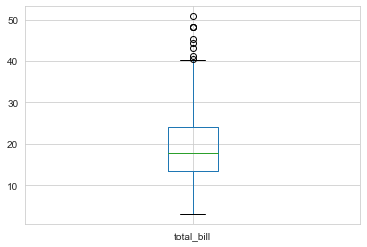

In [23]:
tips.boxplot(column='total_bill')
plt.show()

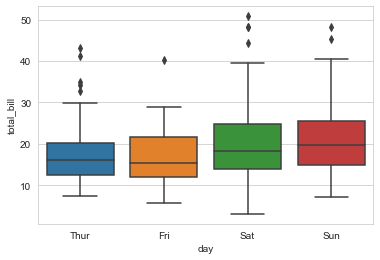

In [24]:
# 요일별 음식지불금액...날짜별로 total_bill을 boxplot으로
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

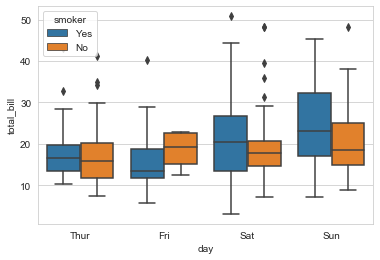

In [25]:
'''
요일별로 살펴본 흡연, 비흡연자들의 전체 total_bill의 boxplot

hue(서로 비교해서 살펴볼 매개변수를 지정할때 사용, 색상으로 대조해서 나타난다)
'''
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)
plt.show()

### Boxplot 이상치 값 제거하기

In [26]:
'''
boxplot 이상치값 제거하는 방법
1) 이상치값 제거
2) 이상치값 변환 - -NaN많이 사용함.
'''

'\nboxplot 이상치값 제거하는 방법\n1) 이상치값 제거\n2) 이상치값 변환 - -NaN많이 사용함.\n'

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

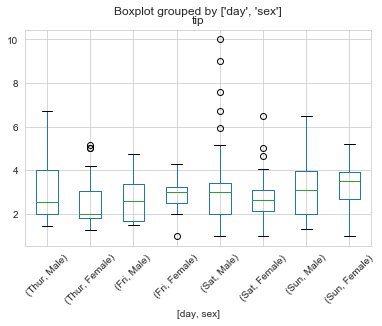

In [27]:
z = tips.boxplot(column=['tip'], by=['day', 'sex']) # y축이 tip
plt.xticks(rotation=45)

In [28]:
#이상치값 제거 함수
def removeOutlier(x, column):
    #Q1, Q3 구하기
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    # iqt(IQR 범위를 벗어난 값..사분위범위를 벗어난 값)
    iqt = 1.5 * (q3 - q1)
    
    #원래 데이타 복제
    y = x
    
    y['tip'][(tips['tip'] > (q3+iqt)) | (tips['tip'] < (q1-iqt))] = None
    y['tip']
    
    return(y)

C:\edna\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


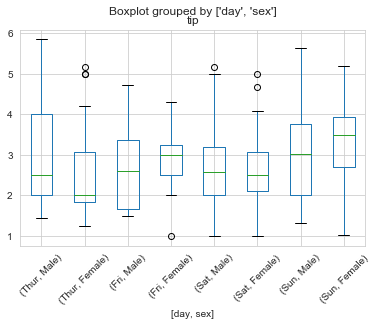

In [29]:
removeOutlier(tips, 'tip').boxplot(column='tip', by=['day', 'sex'])
plt.xticks(rotation=45)
plt.show()

### lmplot

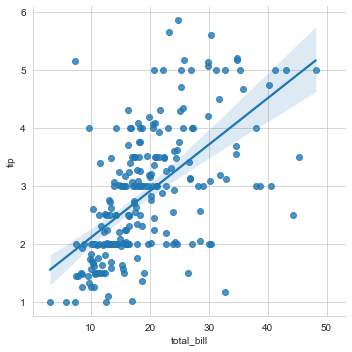

In [30]:
'''
선
쉐도우
의 의미를 정리

이 그래프를 어떤 데이타에 적용시키면 좋을지...
각각의 그래프별 특징...정리한 결과물
'''
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

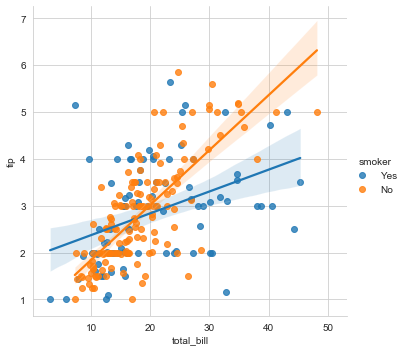

In [31]:
'''
total_bill에 따른 팁을 더 많이 주는 사람이 
흡연자인지 비흡연자인지 여부를 알고 싶다...hue
'''
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.show()

### HeatMap

In [32]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [33]:
# pivot 사용해서 index=month, columns=year, values=passengers
flights = flights.pivot_table('passengers', 'month', 'year')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


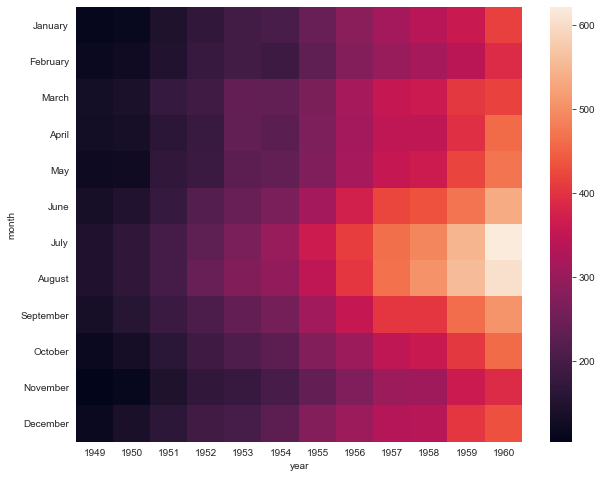

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(flights) # 디폴트값이 안보인다..
plt.show()

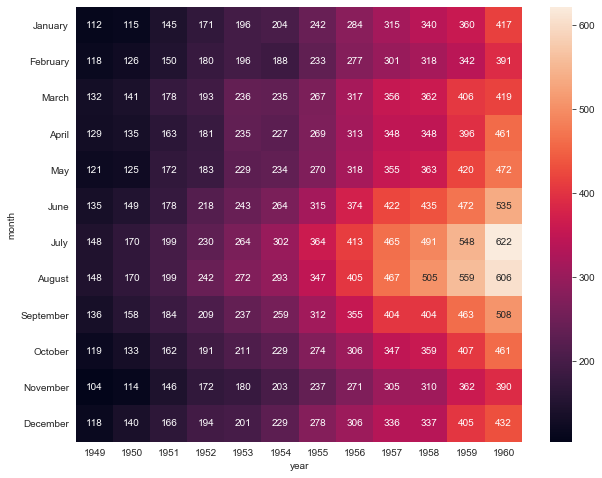

In [36]:
'''
x축은 year
y축은 month가 된다.

값이 점점커지는 쪽...점점 환해지는 쪽...
1960년 7월....휴가철

'''
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d') # 디폴트값이 안보인다..
plt.show()